<center>

# Introduccion a Programación Cuántica – CENIDET 

## 🧠 Mediciones en Qiskit 🧠
Autor: **Oscar Alejandro López Campero**  
Maestría en Ciencias de la Computación – Línea de Ingeniería de Software  
Agosto 2025

---

</center>


## 📚 Contenido del Módulo: Medición y Resultados en Circuitos Cuánticos

En este módulo el estudiante aprenderá a interpretar los resultados de un circuito cuántico mediante **la medición de qubits**, comprendiendo cómo el estado cuántico colapsa a un valor clásico y cómo esto afecta la probabilidad de los resultados.

Se explorarán las herramientas que ofrece Qiskit para simular mediciones, visualizar los resultados mediante histogramas y ejecutar experimentos repetidos (**shots**) para obtener distribuciones estadísticas.

Este conocimiento es esencial para dar el siguiente paso hacia el diseño de algoritmos cuánticos reales, ya que **todo programa cuántico termina en una medición**.

---

## 🧾 Temario

1️⃣ **Fundamentos de la medición cuántica**  
2️⃣ **Cómo agregar mediciones en Qiskit**  
3️⃣ **Ejemplo: medición de un qubit en estado base**  
4️⃣ **Medición de un qubit en superposición**  
5️⃣ **Visualización de resultados con histogramas**  
6️⃣ **Medición en sistemas de múltiples qubits**  
7️⃣ **Interpretación estadística y colapso del estado**  
8️⃣ **Ejercicios y experimentación**

---


---

## ⚙️ Sección 1 – Fundamentos de la medición cuántica

En computación cuántica, **medir un qubit** significa observar su estado y obtener como resultado un valor clásico:  
- `0` si el qubit colapsa al estado `|0⟩`  
- `1` si colapsa al estado `|1⟩`

> ⚠️ La medición **colapsa** el estado cuántico: una vez que se mide, el qubit ya no está en superposición.

Antes de la medición, un qubit puede estar en un estado como:
$$
|ψ⟩ = α|0⟩ + β|1⟩
$$


Donde:
- `|α|²` es la **probabilidad** de medir un `0`  
- `|β|²` es la **probabilidad** de medir un `1`

El resultado que obtienes al medir un qubit **es aleatorio**, pero obedece a esas probabilidades.  
Por eso en Qiskit ejecutamos los circuitos muchas veces (llamados **shots**) para obtener una distribución confiable.

---

🧪 En resumen:

- La medición convierte un estado cuántico en un valor clásico.
- Colapsa la superposición, eliminando la coherencia.
- Los resultados siguen una distribución probabilística.
- Se representa en Qiskit con `qc.measure(...)`.

---


## 🧪 Sección 2 – Cómo agregar mediciones en Qiskit

En los circuitos cuánticos, las mediciones son el puente entre el mundo cuántico y el clásico.

Medir un qubit significa colapsar su estado cuántico a uno de los dos posibles resultados clásicos: 0 o 1.


Qiskit permite agregar mediciones explícitamente usando el método `.measure()`.

Este método conecta un qubit con un bit clásico, y guarda el resultado de la medición en ese bit clásico.


En esta sección aprenderemos cómo:

- Agregar una medición a un circuito cuántico
- Visualizar el circuito con la operación de medición
- Ejecutar el circuito en un simulador y obtener resultados
- Interpretar los resultados de la medición


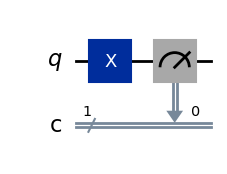

In [2]:
from qiskit import QuantumCircuit

# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)

# Aplicar compuerta X para poner el qubit en estado |1⟩
qc.x(0)

# Medir el qubit 0 y guardar el resultado en el bit clásico 0
qc.measure(0, 0)

# Mostrar el circuito
qc.draw('mpl')


### 🔍 ¿Qué vemos en el diagrama del circuito?

El circuito mostrado contiene **1 qubit** (`q0`) y **1 bit clásico** (`c0`). Visualmente se representa como dos líneas horizontales:  
- La **línea superior** corresponde al **qubit q0**  
- La **línea inferior** corresponde al **bit clásico c0**

Los elementos que aparecen en el diagrama son:

- `x`: Compuerta X (NOT cuántico) aplicada al qubit `q0`. Cambia su estado de `|0⟩` a `|1⟩`.
- `measure`: Símbolo de medición que indica que se realiza una medición sobre el qubit `q0`.
- **Conexión hacia `c0`**: La medición del qubit se guarda en el bit clásico `c0`, mostrando la transición del mundo cuántico al mundo clásico.

🔁 En este caso, como aplicamos la compuerta `X` antes de medir, el estado cuántico final del qubit es `|1⟩`.  
Por lo tanto, **el resultado clásico medido será siempre `1`**.


### ▶️ Ejecutar el circuito y visualizar resultados

Una vez que tenemos un circuito con medición, es momento de **simularlo** y observar qué resultado obtenemos al medir el qubit.

En este ejemplo, usaremos el simulador `BasicSimulator` de Qiskit, que permite ejecutar el circuito de forma simple sin dependencias externas. Ejecutaremos el circuito **1024 veces** y contaremos cuántas veces se obtiene cada posible resultado (0 o 1).

Usamos las siguientes funciones de Qiskit:

- `BasicSimulator()`: crea un simulador clásico que ejecuta circuitos cuánticos y produce resultados probabilísticos.
- `simulator.run(circuito, shots=1024)`: ejecuta el circuito 1024 veces para recolectar estadísticas sobre las mediciones.
- `result.get_counts()`: obtiene un diccionario con los resultados de la medición, donde las claves son los estados medidos (como "0" o "1") y los valores indican cuántas veces se midió cada uno.
- `plot_histogram(counts)`: genera un histograma que muestra visualmente la frecuencia con la que aparece cada estado medido.

Este tipo de simulación nos ayuda a **comprender la naturaleza probabilística** de los sistemas cuánticos una vez que se realiza una medición.


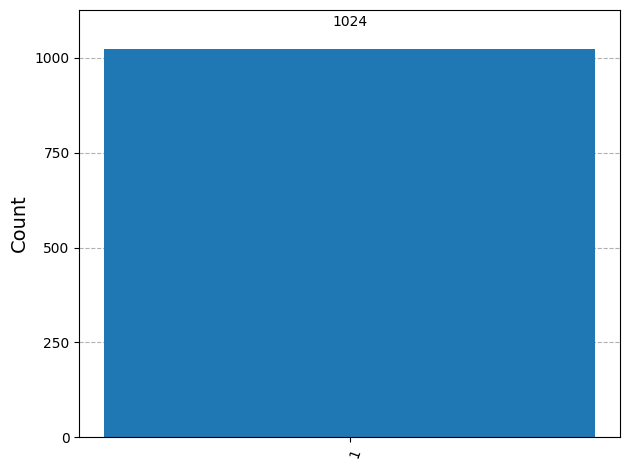

In [5]:
# Importar componentes actualizados
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Crear circuito con una compuerta Hadamard y medición
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

# Usar BasicSimulator (proveedor básico moderno)
simulator = BasicSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar resultados
plot_histogram(counts)
